# ANALYSIS OF RED WINE QUALITY

In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load and Read the dataset
data = 'winequality_red.csv'
wine = pd.read_csv(data)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Shape of columns and rows
print("Shape of Red Wine dataset:", np.shape(wine))

Shape of Red Wine dataset: (1599, 12)


The dataset has a total of 1599 observation in row and 12 different attributes in column

###### Description and information of the dataset

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see that the 12 columns are of numeric data types and out of the 12 columns, 11 of them have predictor variables(float) and the last one is a response variable(int).

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Red Wine-Quality Rating
###### Rating the Red Wine dataest from the Quality Column

###### Good = 7-10
###### Average = 5-6
###### Bad = 1-4

In [6]:
rate = []
for i in range(len(wine['quality'])):
    if wine['quality'][i] >= 7:
        rate.append('good')
    elif 5 <= wine['quality'][i] < 7:
        rate.append('average')
    else:
        rate.append('bad')
wine['rating'] = rate
wine.set_index('rating').sort_values(by=['rating']).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
average,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5
average,7.9,0.310,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6
average,8.6,0.830,0.00,2.8,0.095,17.0,43.0,0.99822,3.33,0.60,10.4,6
average,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6


In [7]:
wine['rating'].value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [8]:
#Grouping the data wrt its rating 
#and finding the mean of the values
#in each rating type for each column
grp_wine = wine.groupby('rating').mean()
grp_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


## VISUALIZATION

#### Analysis of Alcohol to Wine Rating and Quality

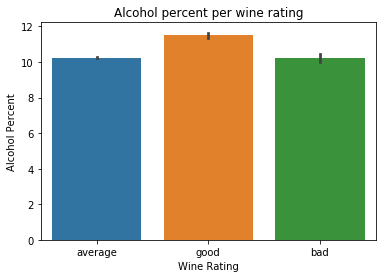

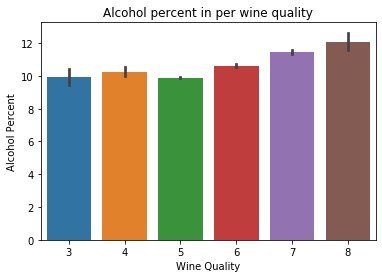

In [9]:
alc_rating = sns.barplot(x="rating", y='alcohol', data = wine)
alc_rating.set(xlabel='Wine Rating', ylabel='Alcohol Percent', title='Alcohol percent per wine rating')
plt.show()
alc_quality = sns.barplot(x="quality", y='alcohol', data = wine)
alc_quality.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in per wine quality')
plt.show()

#### Analysis of Fixed Acidity to Wine Quality

[Text(0, 0.5, 'Acidity Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Acidity percentage per wine quality')]

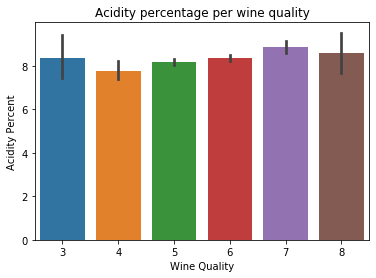

In [10]:
acd_quality = sns.barplot(x="quality", y='fixed acidity', data = wine)
acd_quality.set(xlabel='Wine Quality', ylabel='Acidity Percent', title='Acidity percentage per wine quality')

#### Analysis of Free SulPhur Dioxide and Total Sulphur Dioxide to Wine Rating and Quality

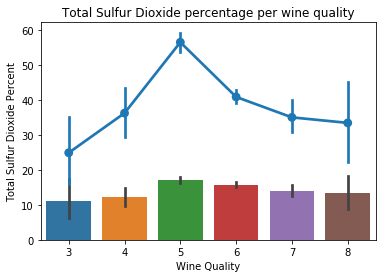

Graph showing the increase rate of free sulphur dioxide in bar plot
And increases rate of total sulphur dioxide in line plot


In [11]:
FSD_quality = sns.barplot(x="quality", y='free sulfur dioxide', data = wine)
FSD_quality.set(xlabel='Wine Quality', ylabel='Free Sulfur Dioxide Percent', title='Free Sulfur Dioxide percentage per wine quality')
TSD_quality = sns.pointplot(x="quality", y='total sulfur dioxide', data = wine, )
TSD_quality.set(xlabel='Wine Quality', ylabel='Total Sulfur Dioxide Percent', title='Total Sulfur Dioxide percentage per wine quality')
plt.show()
print('Graph showing the increase rate of free sulphur dioxide in bar plot')
print('And increases rate of total sulphur dioxide in line plot')

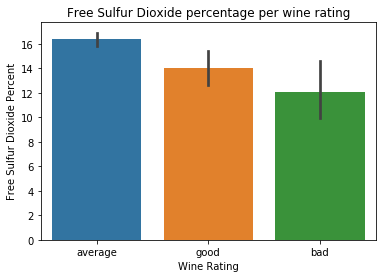

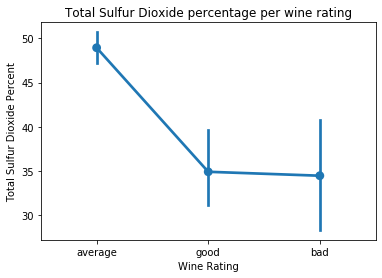

In [12]:
plt.figuresize = (15, 10)
FSD_rating = sns.barplot(x='rating', y='free sulfur dioxide', data = wine)
FSD_rating.set(xlabel='Wine Rating', ylabel='Free Sulfur Dioxide Percent', title='Free Sulfur Dioxide percentage per wine rating')
plt.show()
TSD_rating = sns.pointplot(x='rating', y='total sulfur dioxide', data = wine, )
TSD_rating.set(xlabel='Wine Rating', ylabel='Total Sulfur Dioxide Percent', title='Total Sulfur Dioxide percentage per wine rating')
plt.show()

###### Analysis of Sulphate to Wine Rating and Wine Quality

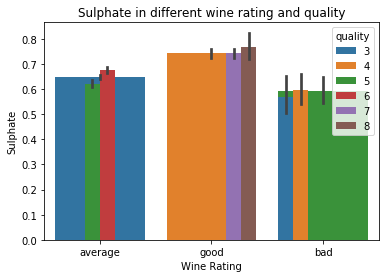

In [13]:
TSD_quality = sns.barplot(x="rating", y='sulphates', data = wine)
quality_rating = sns.barplot('rating', 'sulphates', 'quality', data = wine)
TSD_quality.set(xlabel='Wine Rating', ylabel='Sulphate', title='Sulphate in different wine rating and quality')
plt.show()

The graph above shows how sulphate affects the rating and quality of the wine. We can see that with more quantity of sulphate, the more better the wine

###### Analysis of Residual Sugar to Wine Rating and Wine Quality

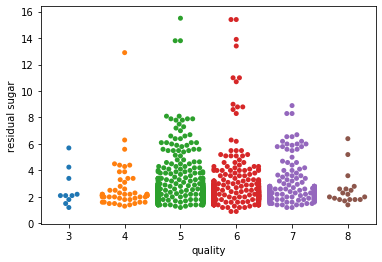

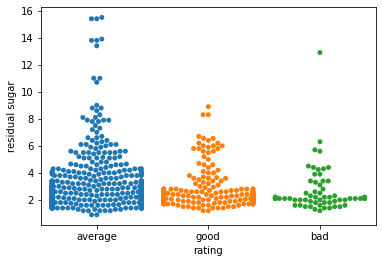

In [14]:
res_quality = sns.swarmplot('quality', 'residual sugar', data = wine)
plt.show()
res_ratings = sns.swarmplot('rating', 'residual sugar', data = wine)
plt.show()

###### Analysis of Residual Sugar and Alcohol to Wine Rating

[Text(0, 0.5, 'Residual Sugar and alcohol'),
 Text(0.5, 0, 'Wine Rating'),
 Text(0.5, 1.0, 'Residual Sugar and alcohol in different wine rating')]

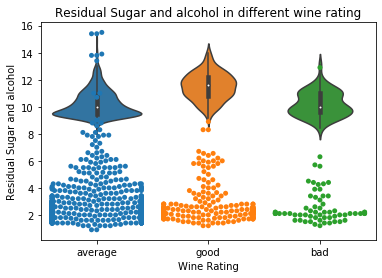

In [15]:
res_rating = sns.swarmplot(x='rating', y='residual sugar', data = wine)
alc_rating = sns.violinplot(x='rating', y='alcohol', data = wine)
alc_rating.set(xlabel='Wine Rating', ylabel='Residual Sugar and alcohol', title='Residual Sugar and alcohol in different wine rating')

The wine quality is good with a average level of residual sugar and alcohol.

###### Analysis of PH and Wine Rating

[Text(0, 0.5, 'PH'),
 Text(0.5, 0, 'Wine Rating'),
 Text(0.5, 1.0, 'PH in different wine rating')]

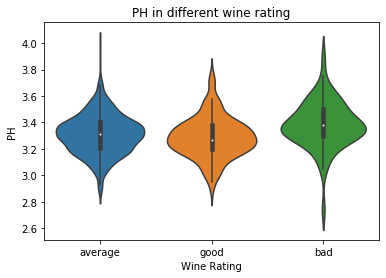

In [16]:
Ph_rating = sns.violinplot(x='rating', y='pH', data = wine)
Ph_rating.set(xlabel='Wine Rating', ylabel='PH', title='PH in different wine rating')